# Base Model

# Access Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

from sklearn.model_selection import RepeatedStratifiedKFold

#from xgboost import XGBClassifier
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import math as mt
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as ltb
import xgboost as xgb
%matplotlib inline

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import random
np.random.seed(42)
random.seed(42)

In [2]:
dataset_569 = pd.read_csv(r"C:\Users\amits\OneDrive\Documents\project570\breast-cancer570.csv")

In [3]:
dataset_569

id diagnosis  Radius_mean  Texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         21.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

# ID remove

In [4]:
dataset_569 = dataset_569.drop(columns=['id'])

# Encoding

In [5]:
en_data = dataset_569[["diagnosis"]]
pd.get_dummies(en_data)
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop="first")
ar=ohe.fit_transform(en_data).toarray()
dataset_569=dataset_569.copy()
dataset_569[["diagnosis"]]=pd.DataFrame(ar,columns=["diagnosis"])

In [6]:
dataset_569

diagnosis  Radius_mean  Texture_mean  perimeter_mean  area_mean  \
0          1.0        17.99         10.38          122.80     1001.0   
1          1.0        20.57         21.77          132.90     1326.0   
2          1.0        19.69         21.25          130.00     1203.0   
3          1.0        11.42         20.38           77.58      386.1   
4          1.0        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564        1.0        21.56         22.39          142.00     1479.0   
565        1.0        20.13         28.25          131.20     1261.0   
566        1.0        16.60         28.08          108.30      858.1   
567        1.0        20.60         29.33          140.10     1265.0   
568        0.0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

# Kfold 

In [7]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize KFold with 10 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store accuracy for each fold
fold_accuracies = []

# Split data into features and target
x = dataset_569.drop(columns="diagnosis", axis=1)
Y = dataset_569["diagnosis"]

# Perform K-Fold Cross Validation
for fold, (train_index, test_index) in enumerate(kf.split(x), 1):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Initialize and train the logistic regression model
    model = LogisticRegression()
    model.fit(x_train, Y_train)
    
    # Make predictions on the test fold
    Y_pred = model.predict(x_test)
    
    # Calculate and store accuracy for this fold
    accuracy = accuracy_score(Y_test, Y_pred)
    fold_accuracies.append(accuracy)
    print(f"Fold {fold} - Accuracy: {accuracy:.4f}")

# Print the average accuracy across all folds
average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
print(f"\nAverage accuracy across all folds: {average_accuracy:.4f}")


Fold 1 - Accuracy: 0.9649
Fold 2 - Accuracy: 0.9825
Fold 3 - Accuracy: 0.8947
Fold 4 - Accuracy: 0.9737
Fold 5 - Accuracy: 0.9204

Average accuracy across all folds: 0.9472


In [8]:
dataset_569

diagnosis  Radius_mean  Texture_mean  perimeter_mean  area_mean  \
0          1.0        17.99         10.38          122.80     1001.0   
1          1.0        20.57         21.77          132.90     1326.0   
2          1.0        19.69         21.25          130.00     1203.0   
3          1.0        11.42         20.38           77.58      386.1   
4          1.0        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564        1.0        21.56         22.39          142.00     1479.0   
565        1.0        20.13         28.25          131.20     1261.0   
566        1.0        16.60         28.08          108.30      858.1   
567        1.0        20.60         29.33          140.10     1265.0   
568        0.0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

# Classification

In [9]:
# # Define classifiers
# classifiers = {
#     "Logistic Regression": LogisticRegression(),
#     "K-Nearest Neighbors": KNeighborsClassifier(),
#     "Support Vector Machine": SVC(),
#     "Naïve Bayes": GaussianNB(),
#     "Decision Tree": DecisionTreeClassifier(, random_state=42),
#     "Random Forest": RandomForestClassifier(, random_state=42),
#     "Rotation Forest (Extra Trees)": ExtraTreesClassifier()
# }

# # Store results
# results = {}

# # Perform K-Fold Cross Validation for each classifier
# for name, clf in classifiers.items():
#     fold_accuracies = []
#     for train_index, test_index in kf.split(x):
#         x_train, x_test = x.iloc[train_index], x.iloc[test_index]
#         Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

#         # Train classifier
#         clf.fit(x_train, Y_train)
        
#         # Make predictions
#         Y_pred = clf.predict(x_test)
        
#         # Calculate accuracy
#         accuracy = accuracy_score(Y_test, Y_pred)
#         fold_accuracies.append(accuracy)
    
#     # Store average accuracy
#     avg_accuracy = np.mean(fold_accuracies)
#     results[name] = avg_accuracy
#     print(f"{name} - Average Accuracy: {avg_accuracy:.4f}")

# # Print final results
# print("\nFinal Accuracy Results:")
# for classifier, accuracy in results.items():
#     print(f"{classifier}: {accuracy:.4f}")





# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naïve Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Rotation Forest (Extra Trees)": ExtraTreesClassifier()
}

# Store results
results = {}

# Split data once
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train classifier
    clf.fit(x_train, Y_train)
    
    # Predict
    Y_pred = clf.predict(x_test)
    
    # Accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    results[name] = accuracy
    print(f"{name} - Accuracy: {accuracy:.4f}")

# Final results
print("\nFinal Accuracy Results:")
for classifier, accuracy in results.items():
    print(f"{classifier}: {accuracy:.4f}")


Logistic Regression - Accuracy: 0.9561
K-Nearest Neighbors - Accuracy: 0.9561
Support Vector Machine - Accuracy: 0.9474
Naïve Bayes - Accuracy: 0.9737
Decision Tree - Accuracy: 0.9474
Random Forest - Accuracy: 0.9649
Rotation Forest (Extra Trees) - Accuracy: 0.9649

Final Accuracy Results:
Logistic Regression: 0.9561
K-Nearest Neighbors: 0.9561
Support Vector Machine: 0.9474
Naïve Bayes: 0.9737
Decision Tree: 0.9474
Random Forest: 0.9649
Rotation Forest (Extra Trees): 0.9649


In [10]:
dataset_569

diagnosis  Radius_mean  Texture_mean  perimeter_mean  area_mean  \
0          1.0        17.99         10.38          122.80     1001.0   
1          1.0        20.57         21.77          132.90     1326.0   
2          1.0        19.69         21.25          130.00     1203.0   
3          1.0        11.42         20.38           77.58      386.1   
4          1.0        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564        1.0        21.56         22.39          142.00     1479.0   
565        1.0        20.13         28.25          131.20     1261.0   
566        1.0        16.60         28.08          108.30      858.1   
567        1.0        20.60         29.33          140.10     1265.0   
568        0.0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

# Propose Model

# Data Preparation

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

from sklearn.model_selection import RepeatedStratifiedKFold

#from xgboost import XGBClassifier
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import math as mt
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as ltb
import xgboost as xgb
%matplotlib inline

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
df_cancer2 = pd.read_csv(r"C:\Users\amits\OneDrive\Documents\project570\breast-cancer570.csv")

In [13]:
df_cancer2

id diagnosis  Radius_mean  Texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         21.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [14]:
df_cancer2.tail()

id diagnosis  Radius_mean  Texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 32 columns]

In [15]:
df_cancer2.columns

Index(['id', 'diagnosis', 'Radius_mean', 'Texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [16]:
df_cancer2.duplicated().sum()

0

In [17]:
df_cancer2.isnull().sum()

id                         0
diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# ID remove

In [18]:
df_cancer2 = df_cancer2.drop(columns=['id'])

# One Hot Encoding

In [19]:
en_data_OHE = df_cancer2[["diagnosis"]]
pd.get_dummies(en_data_OHE)
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop="first")
ar=ohe.fit_transform(en_data_OHE).toarray()
df_cancer2=df_cancer2.copy()
df_cancer2[["diagnosis"]]=pd.DataFrame(ar,columns=["diagnosis"])

In [20]:
df_cancer2

diagnosis  Radius_mean  Texture_mean  perimeter_mean  area_mean  \
0          1.0        17.99         10.38          122.80     1001.0   
1          1.0        20.57         21.77          132.90     1326.0   
2          1.0        19.69         21.25          130.00     1203.0   
3          1.0        11.42         20.38           77.58      386.1   
4          1.0        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564        1.0        21.56         22.39          142.00     1479.0   
565        1.0        20.13         28.25          131.20     1261.0   
566        1.0        16.60         28.08          108.30      858.1   
567        1.0        20.60         29.33          140.10     1265.0   
568        0.0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

# Outlier detaction

# Outlier remove

In [21]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest



# Convert categorical columns to numerical
for col in df_cancer2.select_dtypes(include=['object', 'category']).columns:
    df_cancer2[col] = pd.factorize(df_cancer2[col])[0]  

# Define feature matrix (X)
X = df_cancer2.to_numpy()  # Convert DataFrame to NumPy array

# Initialize and fit Isolation Forest
iforest = IsolationForest(contamination=0.1, random_state=42)
iforest.fit(X)

# Predict outliers (-1 = outlier, 1 = inlier)
y_pred = iforest.predict(X)

# Remove outliers from dataset
df_cancer = df_cancer2.loc[y_pred == 1].reset_index(drop=True)


# Print summary
print(f"✅ Outlier removal complete!")
print(f"Original dataset size: {df_cancer2.shape[0]} rows")
print(f"Cleaned dataset size: {df_cancer.shape[0]} rows")
print(f"Outliers removed: {df_cancer2.shape[0] - df_cancer.shape[0]}")


✅ Outlier removal complete!
Original dataset size: 569 rows
Cleaned dataset size: 512 rows
Outliers removed: 57


In [22]:
df_cancer

diagnosis  Radius_mean  Texture_mean  perimeter_mean  area_mean  \
0          1.0        20.57         21.77          132.90     1326.0   
1          1.0        19.69         21.25          130.00     1203.0   
2          1.0        20.29         14.34          135.10     1297.0   
3          1.0        12.45         15.70           82.57      477.1   
4          1.0        18.25         19.98          119.60     1040.0   
..         ...          ...           ...             ...        ...   
507        0.0        11.51         23.93           74.52      403.5   
508        0.0        14.05         27.15           91.38      600.4   
509        1.0        20.13         28.25          131.20     1261.0   
510        1.0        16.60         28.08          108.30      858.1   
511        0.0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.08474           0.07864         0.08690              0.07017   
1            0.10960           0.15990         0.19740              0.12790   
2            0.10030           0.13280         0.19800              0.10430   
3            0.12780           0.17000         0.15780              0.08089   
4            0.09463           0.10900         0.11270              0.07400   
..               ...               ...             ...                  ...   
507          0.09261           0.10210         0.11120              0.04105   
508          0.09929           0.11260         0.04462              0.04304   
509          0.09780           0.10340         0.14400              0.09791   
510          0.08455           0.10230         0.09251              0.05302   
511          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.1812  ...        24.990          23.41           158.80   
1           0.2069  ...        23.570          25.53           152.50   
2           0.1809  ...        22.540          16.67           152.20   
3           0.2087  ...        15.470          23.75           103.40   
4           0.1794  ...        22.880          27.66           153.20   
..             ...  ...           ...            ...              ...   
507         0.1388  ...        12.480          37.16            82.28   
508         0.1537  ...        15.300          33.17           100.20   
509         0.1752  ...        23.690          38.25           155.00   
510         0.1590  ...        18.980          34.12           126.70   
511         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        1956.0           0.12380            0.18660           0.2416   
1        1709.0           0.14440            0.42450           0.4504   
2        1575.0           0.13740            0.20500           0.4000   
3         741.6           0.17910            0.52490           0.5355   
4        1606.0           0.14420            0.25760           0.3784   
..          ...               ...                ...              ...   
507       474.2           0.12980            0.25170           0.3630   
508       706.7           0.12410            0.22640           0.1326   
509      1731.0           0.11660            0.19220           0.3215   
510      1124.0           0.11390            0.30940           0.3403   
511       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                 0.18600          0.2750                  0.08902  
1                 0.24300          0.3613                  0.08758  
2                 0.16250          0.2364                  0.07678  
3                 0.17410          0.3985                  0.12440  
4                 0.19320          0.3063                  0.08368  
..                    .

## Normalization Perform

In [23]:
# Separate features and target
a = df_cancer.drop('diagnosis', axis=1)  # Assuming 'Classification' is the target column
b = df_cancer['diagnosis']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the features
X_normalized = scaler.fit_transform(a)

# Convert back to a DataFrame for easy viewing (optional)
X_normalized_df = pd.DataFrame(X_normalized, columns=a.columns)

# Add the target column back if needed
normalized_data = pd.concat([X_normalized_df, b.reset_index(drop=True)], axis=1)

# View the normalized dataset
print(normalized_data.head())

   Radius_mean  Texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.825919      0.407846        0.815704   0.760797         0.368361   
1     0.769181      0.390260        0.787867   0.679070         0.653551   
2     0.807866      0.156578        0.836821   0.741528         0.546862   
3     0.302386      0.202570        0.332597   0.196744         0.862338   
4     0.676338      0.347311        0.688040   0.570764         0.481817   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.248762        0.272499             0.449232       0.409264   
1          0.589875        0.619003             0.818822       0.572335   
2          0.476115        0.620884             0.667734       0.407360   
3          0.632273        0.494826             0.517862       0.583756   
4          0.376207        0.353402             0.473752       0.397843   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0             

In [24]:
# sns.pairplot(df_cancer ,hue ='diagnosis', vars =['Radius_mean','Texture_mean', 'perimeter_mean', 'area_mean',
#  'smoothness_mean', 'compactness_mean' ,'concavity_mean']) 

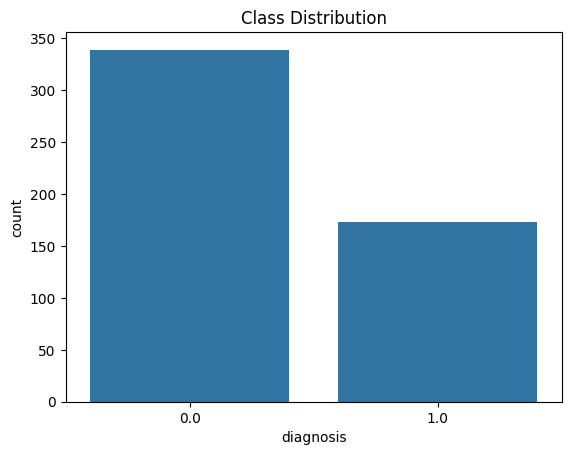

In [25]:
sns.countplot(x=df_cancer['diagnosis'])
plt.title('Class Distribution')
plt.show()

In [26]:
# sns.scatterplot(x='area_mean',y='smoothness_mean',hue='diagnosis',data =df_cancer)

<Axes: >

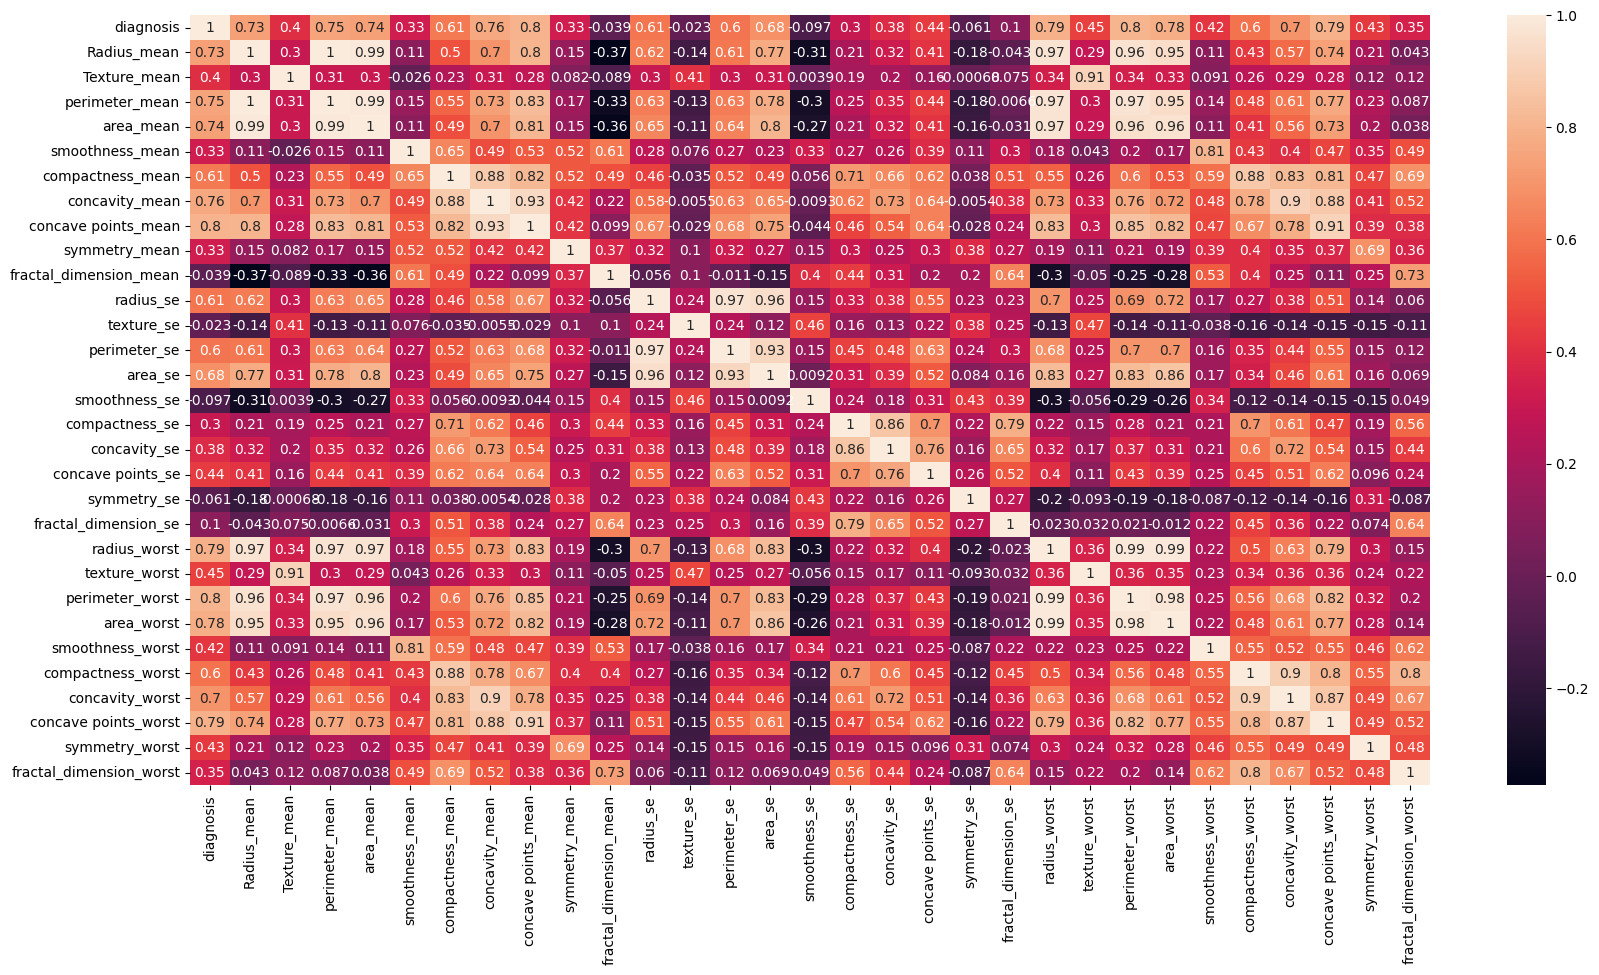

In [27]:
plt.figure(figsize =(20,10))
sns.heatmap(df_cancer.corr(), annot =True)

# Geting X and y

In [28]:
# Defining the X and y
X = normalized_data.drop('diagnosis',axis=1)
y = normalized_data['diagnosis']

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
# X, y = smote.fit_resample(X, y)
# sns.countplot(x=y)
# plt.title('Class Distribution')
# plt.show()

In [29]:
X

Radius_mean  Texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.825919      0.407846        0.815704   0.760797         0.368361   
1       0.769181      0.390260        0.787867   0.679070         0.653551   
2       0.807866      0.156578        0.836821   0.741528         0.546862   
3       0.302386      0.202570        0.332597   0.196744         0.862338   
4       0.676338      0.347311        0.688040   0.570764         0.481817   
..           ...           ...             ...        ...              ...   
507     0.241779      0.480893        0.255327   0.147841         0.458644   
508     0.405545      0.589787        0.417163   0.278671         0.535276   
509     0.797550      0.626987        0.799386   0.717608         0.518183   
510     0.569955      0.621238        0.579574   0.449900         0.366181   
511     0.000000      0.501522        0.000000   0.000000         0.000000   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.248762        0.272499             0.449232       0.409264   
1            0.589875        0.619003             0.818822       0.572335   
2            0.476115        0.620884             0.667734       0.407360   
3            0.632273        0.494826             0.517862       0.583756   
4            0.376207        0.353402             0.473752       0.397843   
..                ...             ...                  ...            ...   
507          0.347242        0.348699             0.262804       0.140228   
508          0.391319        0.139918             0.275544       0.234772   
509          0.352699        0.451552             0.626825       0.371193   
510          0.348082        0.290091             0.339437       0.268401   
511          0.101755        0.000000             0.000000       0.266497   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                  0.225168  ...      0.793131       0.303571   
1                  0.336577  ...      0.722855       0.360075   
2                  0.297651  ...      0.671880       0.123934   
3                  0.878188  ...      0.321984       0.312633   
4                  0.250336  ...      0.688706       0.416844   
..                      ...  ...           ...            ...   
507                0.528188  ...      0.174008       0.670043   
508                0.394295  ...      0.313570       0.563699   
509                0.180201  ...      0.728793       0.699094   
510                0.218792  ...      0.495694       0.589019   
511                0.297987  ...      0.024349       0.489072   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           0.737186    0.722269          0.301026           0.206291   
1           0.691448    0.618173          0.446763           0.528570   
2           0.689270    0.561699          0.397241           0.231217   
3           0.334979    0.210469          0.692253           0.664580   
4           0.696530    0.574764          0.445348           0.302474   
..               ...         ...               ...                ...   
507         0.181647    0.097775          0.343474           0.294481   
508         0.311747    0.195760          0.303148           0.260208   
509         0.709598    0.627444          0.250088           0.213877   
510         0.504138    0.371628          0.230987           0.372646   
511         0.013794    0.011126          0.061620           0.040803   

     concavity_worst  concave points_worst  symmetry_worst  \
0           0.267434              0.688634        0.266376   
1           0.498561              0.899667        0.475740   
2           0.442772              0.601629        0.172732   
3           0.592761              0.644576        0.565987   
4           0.418862              0.715291        0.342310   
..               ...                   ...             ...   
507         0.401815              0.357386        0

# Feature Selection

In [30]:
#1. Filter Method (based on statistics, fast & simple)

selector = SelectKBest(score_func=f_classif, k=15)
X_new = selector.fit_transform(X, y)
filter_method_selected_features = X.columns[selector.get_support()]

print(filter_method_selected_features)

Index(['Radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')


In [31]:
#2. Wrapper Method (like RFE — slower but often more accurate)

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=15)
X_new = rfe.fit_transform(X, y)
wrapper_method_selected_features = X.columns[rfe.support_]

print(wrapper_method_selected_features)

Index(['Radius_mean', 'Texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst'],
      dtype='object')


In [32]:
#3. Embedded Method (e.g., using feature importance from a tree-based model)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
embedded_method_feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display feature importance
print(embedded_method_feature_importance_df)

                    Feature  Importance
23               area_worst    0.153840
27     concave points_worst    0.114824
7       concave points_mean    0.104618
22          perimeter_worst    0.091046
6            concavity_mean    0.088941
20             radius_worst    0.074769
2            perimeter_mean    0.053264
0               Radius_mean    0.048862
26          concavity_worst    0.047299
13                  area_se    0.032959
3                 area_mean    0.028851
21            texture_worst    0.019406
25        compactness_worst    0.015542
5          compactness_mean    0.014230
10                radius_se    0.012568
12             perimeter_se    0.012538
1              Texture_mean    0.011679
28           symmetry_worst    0.009587
4           smoothness_mean    0.008271
24         smoothness_worst    0.008205
29  fractal_dimension_worst    0.007714
15           compactness_se    0.005599
14            smoothness_se    0.005586
8             symmetry_mean    0.005230


In [33]:
# Filter Method

X_selected=X[filter_method_selected_features]

In [34]:
# Embedded Method

#X_selected=X[wrapper_method_selected_features]

In [35]:
# selected_features = embedded_method_feature_importance_df["Feature"].head(25).values
# X_selected = X[selected_features]

In [36]:
X_selected

Radius_mean  perimeter_mean  area_mean  compactness_mean  concavity_mean  \
0       0.825919        0.815704   0.760797          0.248762        0.272499   
1       0.769181        0.787867   0.679070          0.589875        0.619003   
2       0.807866        0.836821   0.741528          0.476115        0.620884   
3       0.302386        0.332597   0.196744          0.632273        0.494826   
4       0.676338        0.688040   0.570764          0.376207        0.353402   
..           ...             ...        ...               ...             ...   
507     0.241779        0.255327   0.147841          0.347242        0.348699   
508     0.405545        0.417163   0.278671          0.391319        0.139918   
509     0.797550        0.799386   0.717608          0.352699        0.451552   
510     0.569955        0.579574   0.449900          0.348082        0.290091   
511     0.000000        0.000000   0.000000          0.101755        0.000000   

     concave points_mean  radius_se  perimeter_se   area_se  radius_worst  \
0               0.449232   0.341749      0.304719  0.396457      0.793131   
1               0.818822   0.502708      0.441675  0.514019      0.722855   
2               0.667734   0.511946      0.540095  0.516435      0.671880   
3               0.517862   0.175295      0.168455  0.120143      0.321984   
4               0.473752   0.264654      0.279566  0.277599      0.688706   
..                   ...        ...           ...       ...           ...   
507             0.262804   0.099076      0.136033  0.059918      0.174008   
508             0.275544   0.199188      0.245875  0.135759      0.313570   
509             0.626825   0.518557      0.512980  0.543542      0.728793   
510             0.339437   0.272380      0.307834  0.246014      0.495694   
511             0.000000   0.216072      0.206646  0.072765      0.024349   

     perimeter_worst  area_worst  compactness_worst  concavity_worst  \
0           0.737186    0.722269           0.206291         0.267434   
1           0.691448    0.618173           0.528570         0.498561   
2           0.689270    0.561699           0.231217         0.442772   
3           0.334979    0.210469           0.664580         0.592761   
4           0.696530    0.574764           0.302474         0.418862   
..               ...         ...                ...              ...   
507         0.181647    0.097775           0.294481         0.401815   
508         0.311747    0.195760           0.260208         0.146779   
509         0.709598    0.627444           0.213877         0.355878   
510         0.504138    0.371628           0.372646         0.376688   
511         0.013794    0.011126           0.040803         0.000000   

     concave points_worst  
0                0.688634  
1                0.899667  
2                0.601629  
3                0.644576  
4                0.715291  
..                    ...  
507              0.357386  
508              0.388004  
509              0.602740  
510              0.524991  
511              0.000000  

[512 rows x 15 columns]

In [37]:
# Splitting the data into training and testing sets
# train test split
X_train0, X_test, y_train0, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train0, y_train0)

In [38]:
# Checking the train distribution of dependent variable
y_train.value_counts()

diagnosis
0.0    272
1.0    272
Name: count, dtype: int64

In [39]:
# Create a StandardScaler object to standardize the data
scaler = StandardScaler()

# Apply the StandardScaler to the training data (X_train) to standardize it
X_train = scaler.fit_transform(X_train)

# Apply the same standardization to the testing data (X_test) to maintain consistency
X_test = scaler.transform(X_test)

# Trainig Model

In [40]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")
    
    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score


In [41]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test','ROC-AUC Train', 'ROC-AUC Test','F1 macro Train', 'F1 macro Test'])

In [42]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)


Train ROC AUC: 0.9705882352941176
Test ROC AUC: 0.9498341625207297


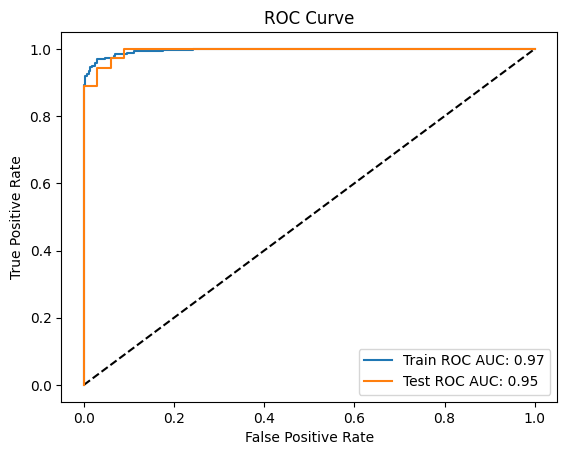


Confusion Matrix:


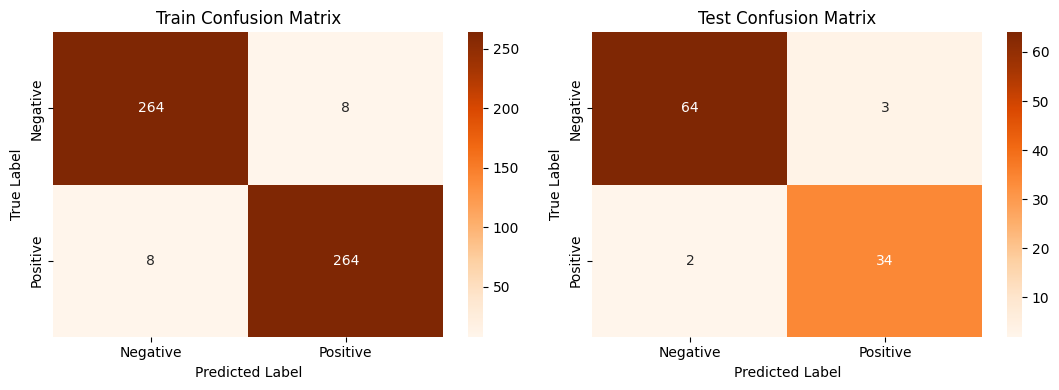


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.970588 | 0.970588 |   0.970588 | 272        |
| 1.0          |    0.970588 | 0.970588 |   0.970588 | 272        |
| accuracy     |    0.970588 | 0.970588 |   0.970588 |   0.970588 |
| macro avg    |    0.970588 | 0.970588 |   0.970588 | 544        |
| weighted avg |    0.970588 | 0.970588 |   0.970588 | 544        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.969697 | 0.955224 |   0.962406 |  67        |
| 1.0          |    0.918919 | 0.944444 |   0.931507 |  36        |
| accuracy     |    0.951456 | 0.951456 |   0.951456 |   0.951456 |
| macro avg    |    0.944308 | 0.949834 |   0.946956 | 103        |
| weighted avg |    0.951949 | 0.951456 |   0.951606 | 10

In [43]:
lr_score = evaluate_model(lr_model, X_train, X_test, y_train, y_test)

In [44]:
# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score

Logistic regression
Precision Train             0.970588
Precision Test              0.951949
Recall Train                0.970588
Recall Test                 0.951456
Accuracy Train              0.970588
Accuracy Test               0.951456
ROC-AUC Train               0.970588
ROC-AUC Test                0.949834
F1 macro Train              0.970588
F1 macro Test               0.951606

# Using k-fold

In [45]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

from sklearn.model_selection import RepeatedStratifiedKFold

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(X_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [46]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Train ROC AUC: 0.9779411764705882
Test ROC AUC: 0.943407960199005


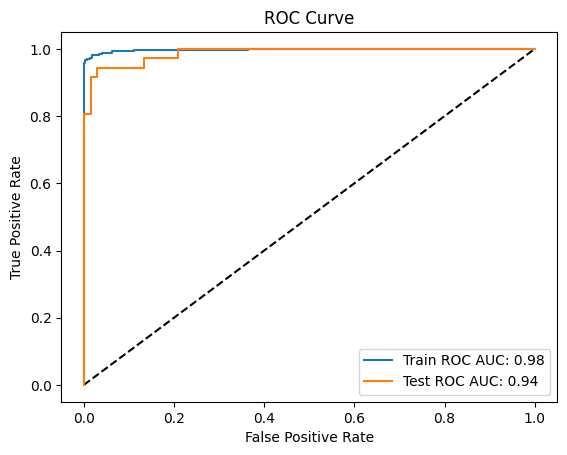


Confusion Matrix:


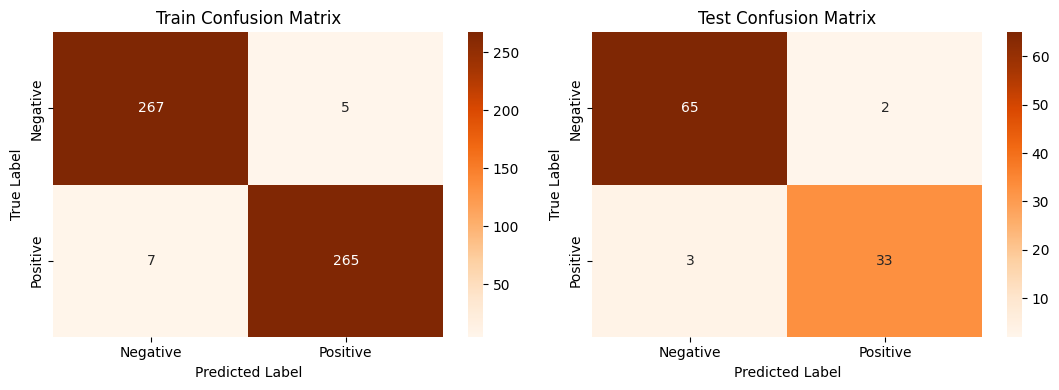


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.974453 | 0.981618 |   0.978022 | 272        |
| 1.0          |    0.981481 | 0.974265 |   0.97786  | 272        |
| accuracy     |    0.977941 | 0.977941 |   0.977941 |   0.977941 |
| macro avg    |    0.977967 | 0.977941 |   0.977941 | 544        |
| weighted avg |    0.977967 | 0.977941 |   0.977941 | 544        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.955882 | 0.970149 |   0.962963 |  67        |
| 1.0          |    0.942857 | 0.916667 |   0.929577 |  36        |
| accuracy     |    0.951456 | 0.951456 |   0.951456 |   0.951456 |
| macro avg    |    0.94937  | 0.943408 |   0.94627  | 103        |
| weighted avg |    0.95133  | 0.951456 |   0.951294 | 10

In [47]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, X_train, X_test, y_train, y_test)

In [48]:
score['Logistic regression tuned'] = lr_score2

In [49]:
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned
Precision Train             0.970588                   0.977967
Precision Test              0.951949                   0.951330
Recall Train                0.970588                   0.977941
Recall Test                 0.951456                   0.951456
Accuracy Train              0.970588                   0.977941
Accuracy Test               0.951456                   0.951456
ROC-AUC Train               0.970588                   0.977941
ROC-AUC Test                0.949834                   0.943408
F1 macro Train              0.970588                   0.977941
F1 macro Test               0.951606                   0.951294

In [50]:
# ML Model - 2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 1.0
Test ROC AUC: 0.8857794361525705


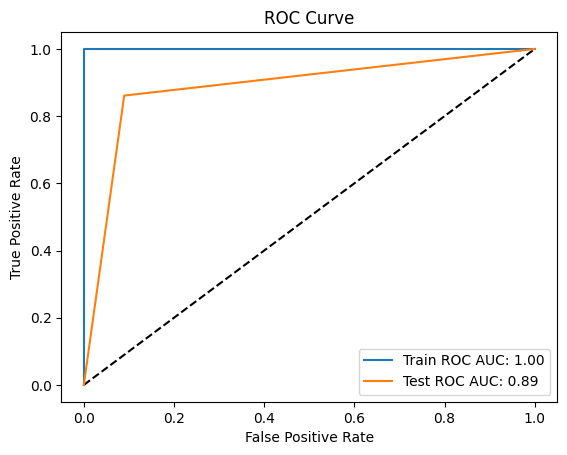


Confusion Matrix:


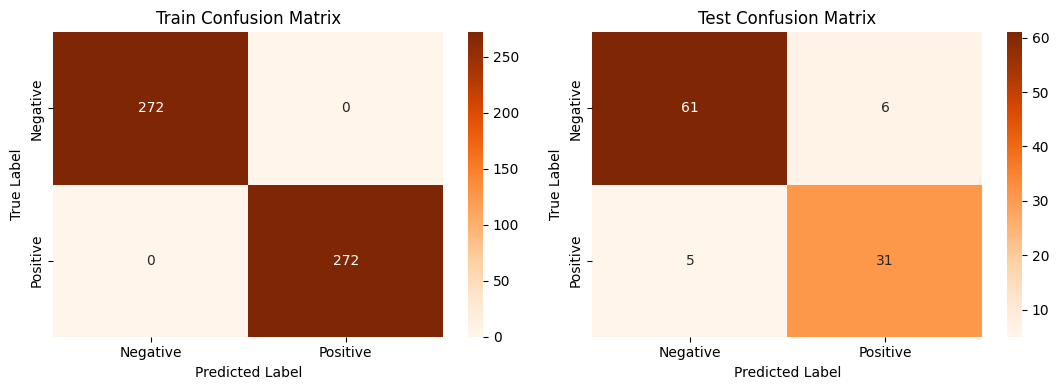


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |       272 |
| 1.0          |           1 |        1 |          1 |       272 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       544 |
| weighted avg |           1 |        1 |          1 |       544 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.924242 | 0.910448 |   0.917293 |  67        |
| 1.0          |    0.837838 | 0.861111 |   0.849315 |  36        |
| accuracy     |    0.893204 | 0.893204 |   0.893204 |   0.893204 |
| macro avg    |    0.88104  | 0.885779 |   0.883304 | 103        |
| weighted avg |    0.894043 | 0.893204 |   0.893534 | 103      

In [51]:
dt_score = evaluate_model(dt_model, X_train, X_test, y_train, y_test)

In [52]:
# Updated Evaluation metric Score Chart
score['Decision Tree'] = dt_score
score

Logistic regression  Logistic regression tuned  Decision Tree
Precision Train             0.970588                   0.977967       1.000000
Precision Test              0.951949                   0.951330       0.894043
Recall Train                0.970588                   0.977941       1.000000
Recall Test                 0.951456                   0.951456       0.893204
Accuracy Train              0.970588                   0.977941       1.000000
Accuracy Test               0.951456                   0.951456       0.893204
ROC-AUC Train               0.970588                   0.977941       1.000000
ROC-AUC Test                0.949834                   0.943408       0.885779
F1 macro Train              0.970588                   0.977941       1.000000
F1 macro Test               0.951606                   0.951294       0.893534

In [53]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [54]:
# Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Train ROC AUC: 0.9705882352941176
Test ROC AUC: 0.913557213930348


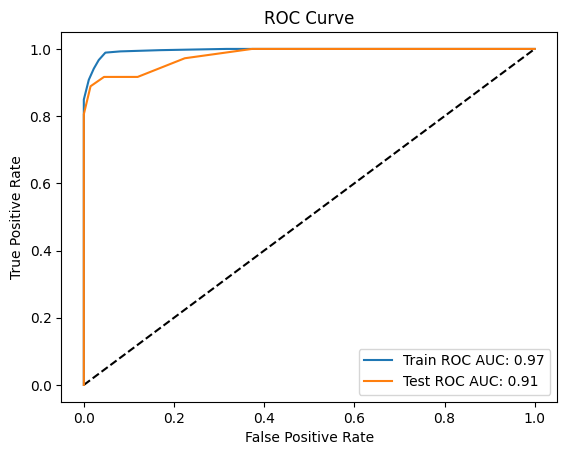


Confusion Matrix:


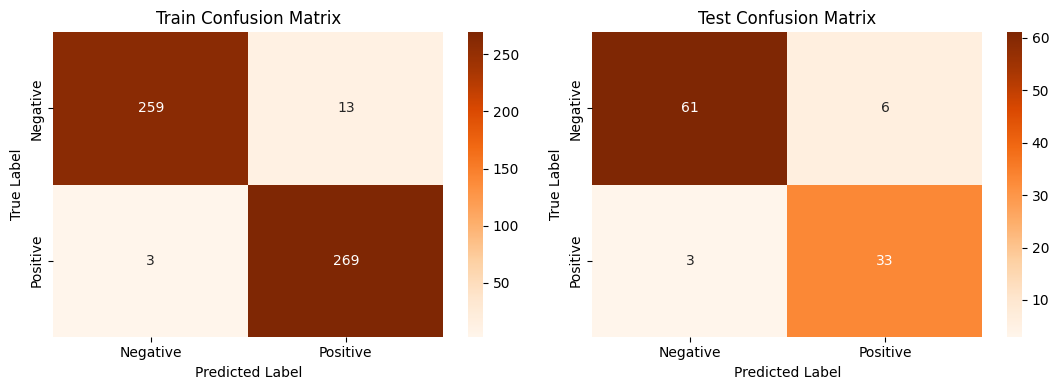


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.98855  | 0.952206 |   0.970037 | 272        |
| 1.0          |    0.953901 | 0.988971 |   0.971119 | 272        |
| accuracy     |    0.970588 | 0.970588 |   0.970588 |   0.970588 |
| macro avg    |    0.971225 | 0.970588 |   0.970578 | 544        |
| weighted avg |    0.971225 | 0.970588 |   0.970578 | 544        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.953125 | 0.910448 |   0.931298 |  67        |
| 1.0          |    0.846154 | 0.916667 |   0.88     |  36        |
| accuracy     |    0.912621 | 0.912621 |   0.912621 |   0.912621 |
| macro avg    |    0.899639 | 0.913557 |   0.905649 | 103        |
| weighted avg |    0.915737 | 0.912621 |   0.913368 | 10

In [55]:
# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, X_train, X_test, y_train, y_test)
     

In [56]:
score['Decision Tree tuned'] = dt2_score
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.970588                   0.977967   
Precision Test              0.951949                   0.951330   
Recall Train                0.970588                   0.977941   
Recall Test                 0.951456                   0.951456   
Accuracy Train              0.970588                   0.977941   
Accuracy Test               0.951456                   0.951456   
ROC-AUC Train               0.970588                   0.977941   
ROC-AUC Test                0.949834                   0.943408   
F1 macro Train              0.970588                   0.977941   
F1 macro Test               0.951606                   0.951294   

                 Decision Tree  Decision Tree tuned  
Precision Train       1.000000             0.971225  
Precision Test        0.894043             0.915737  
Recall Train          1.000000             0.970588  
Recall Test           0.893204             0.912621  
Accuracy Train        1.000000             0.970588  
Accuracy Test         0.893204             0.912621  
ROC-AUC Train         1.000000             0.970588  
ROC-AUC Test          0.885779             0.913557  
F1 macro Train        1.000000             0.970578  
F1 macro Test         0.893534             0.913368

In [57]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 1.0
Test ROC AUC: 0.9210199004975124


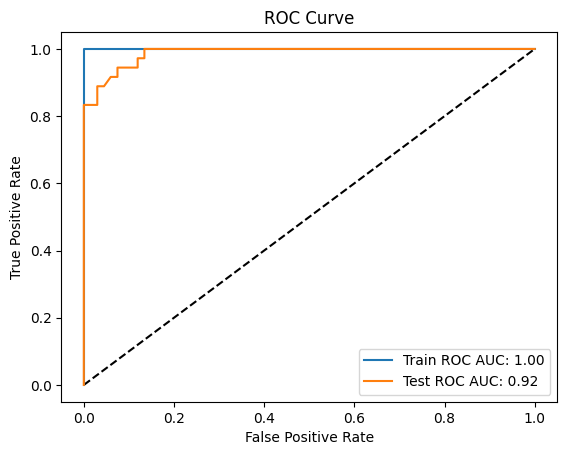


Confusion Matrix:


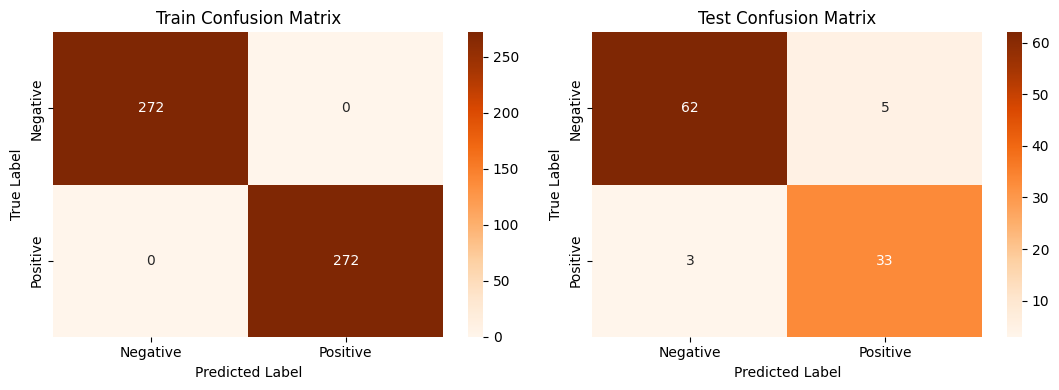


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |       272 |
| 1.0          |           1 |        1 |          1 |       272 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       544 |
| weighted avg |           1 |        1 |          1 |       544 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.953846 | 0.925373 |   0.939394 |  67       |
| 1.0          |    0.868421 | 0.916667 |   0.891892 |  36       |
| accuracy     |    0.92233  | 0.92233  |   0.92233  |   0.92233 |
| macro avg    |    0.911134 | 0.92102  |   0.915643 | 103       |
| weighted avg |    0.923989 | 0.92233  |   0.922791 | 103       |


In [58]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, X_train, X_test, y_train, y_test)

In [59]:
# Updated Evaluation metric Score Chart
score['Random Forest'] = rf_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.970588                   0.977967   
Precision Test              0.951949                   0.951330   
Recall Train                0.970588                   0.977941   
Recall Test                 0.951456                   0.951456   
Accuracy Train              0.970588                   0.977941   
Accuracy Test               0.951456                   0.951456   
ROC-AUC Train               0.970588                   0.977941   
ROC-AUC Test                0.949834                   0.943408   
F1 macro Train              0.970588                   0.977941   
F1 macro Test               0.951606                   0.951294   

                 Decision Tree  Decision Tree tuned  Random Forest  
Precision Train       1.000000             0.971225       1.000000  
Precision Test        0.894043             0.915737       0.923989  
Recall Train          1.000000             0.970588       1.000000  
Recall Test           0.893204             0.912621       0.922330  
Accuracy Train        1.000000             0.970588       1.000000  
Accuracy Test         0.893204             0.912621       0.922330  
ROC-AUC Train         1.000000             0.970588       1.000000  
ROC-AUC Test          0.885779             0.913557       0.921020  
F1 macro Train        1.000000             0.970578       1.000000  
F1 macro Test         0.893534             0.913368       0.922791

In [60]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 100, 'min_samples_split': 3, 'max_depth': 10}


In [61]:
# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Train ROC AUC: 0.9871323529411766
Test ROC AUC: 0.943407960199005


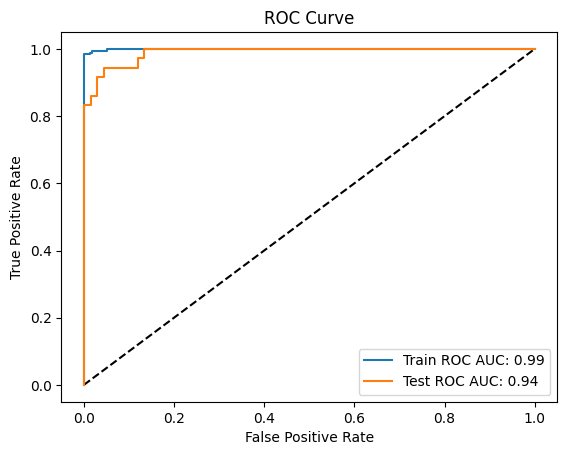


Confusion Matrix:


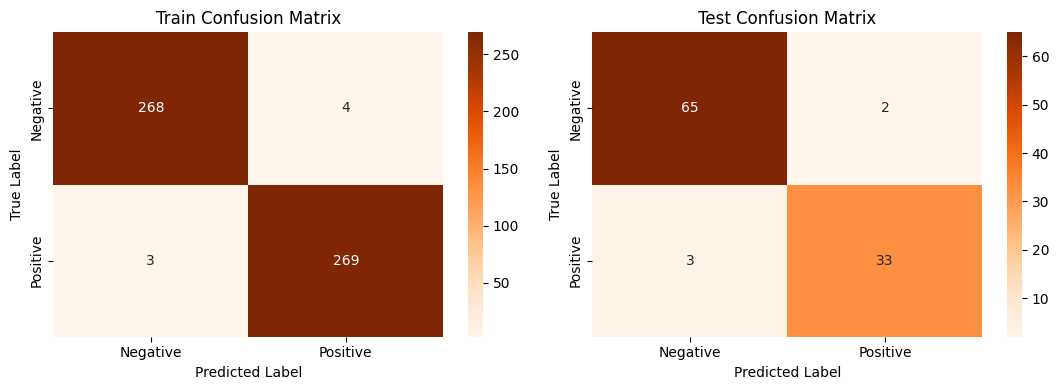


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.98893  | 0.985294 |   0.987109 | 272        |
| 1.0          |    0.985348 | 0.988971 |   0.987156 | 272        |
| accuracy     |    0.987132 | 0.987132 |   0.987132 |   0.987132 |
| macro avg    |    0.987139 | 0.987132 |   0.987132 | 544        |
| weighted avg |    0.987139 | 0.987132 |   0.987132 | 544        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.955882 | 0.970149 |   0.962963 |  67        |
| 1.0          |    0.942857 | 0.916667 |   0.929577 |  36        |
| accuracy     |    0.951456 | 0.951456 |   0.951456 |   0.951456 |
| macro avg    |    0.94937  | 0.943408 |   0.94627  | 103        |
| weighted avg |    0.95133  | 0.951456 |   0.951294 | 10

In [62]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, X_train, X_test, y_train, y_test)

In [63]:
score['Random Forest tuned'] = rf2_score
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.970588                   0.977967   
Precision Test              0.951949                   0.951330   
Recall Train                0.970588                   0.977941   
Recall Test                 0.951456                   0.951456   
Accuracy Train              0.970588                   0.977941   
Accuracy Test               0.951456                   0.951456   
ROC-AUC Train               0.970588                   0.977941   
ROC-AUC Test                0.949834                   0.943408   
F1 macro Train              0.970588                   0.977941   
F1 macro Test               0.951606                   0.951294   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.971225       1.000000   
Precision Test        0.894043             0.915737       0.923989   
Recall Train          1.000000             0.970588       1.000000   
Recall Test           0.893204             0.912621       0.922330   
Accuracy Train        1.000000             0.970588       1.000000   
Accuracy Test         0.893204             0.912621       0.922330   
ROC-AUC Train         1.000000             0.970588       1.000000   
ROC-AUC Test          0.885779             0.913557       0.921020   
F1 macro Train        1.000000             0.970578       1.000000   
F1 macro Test         0.893534             0.913368       0.922791   

                 Random Forest tuned  
Precision Train             0.987139  
Precision Test              0.951330  
Recall Train                0.987132  
Recall Test                 0.951456  
Accuracy Train              0.987132  
Accuracy Test               0.951456  
ROC-AUC Train               0.987132  
ROC-AUC Test                0.943408  
F1 macro Train              0.987132  
F1 macro Test               0.951294

In [64]:
# ML Model - 4 Implementation
svm_model = SVC(kernel='linear', random_state=0, probability=True)

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 0.9724264705882352
Test ROC AUC: 0.9359452736318408


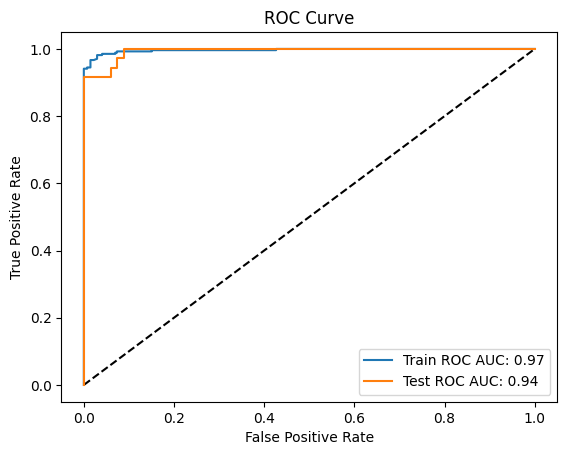


Confusion Matrix:


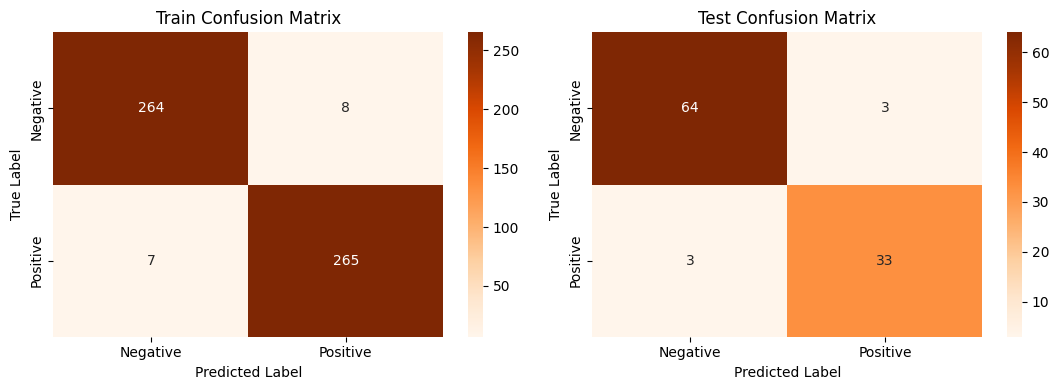


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.97417  | 0.970588 |   0.972376 | 272        |
| 1.0          |    0.970696 | 0.974265 |   0.972477 | 272        |
| accuracy     |    0.972426 | 0.972426 |   0.972426 |   0.972426 |
| macro avg    |    0.972433 | 0.972426 |   0.972426 | 544        |
| weighted avg |    0.972433 | 0.972426 |   0.972426 | 544        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.955224 | 0.955224 |   0.955224 |  67        |
| 1.0          |    0.916667 | 0.916667 |   0.916667 |  36        |
| accuracy     |    0.941748 | 0.941748 |   0.941748 |   0.941748 |
| macro avg    |    0.935945 | 0.935945 |   0.935945 | 103        |
| weighted avg |    0.941748 | 0.941748 |   0.941748 | 10

In [65]:
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, X_train, X_test, y_train, y_test)

In [66]:
# Updated Evaluation metric Score Chart
score['SVM'] = svm_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.970588                   0.977967   
Precision Test              0.951949                   0.951330   
Recall Train                0.970588                   0.977941   
Recall Test                 0.951456                   0.951456   
Accuracy Train              0.970588                   0.977941   
Accuracy Test               0.951456                   0.951456   
ROC-AUC Train               0.970588                   0.977941   
ROC-AUC Test                0.949834                   0.943408   
F1 macro Train              0.970588                   0.977941   
F1 macro Test               0.951606                   0.951294   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.971225       1.000000   
Precision Test        0.894043             0.915737       0.923989   
Recall Train          1.000000             0.970588       1.000000   
Recall Test           0.893204             0.912621       0.922330   
Accuracy Train        1.000000             0.970588       1.000000   
Accuracy Test         0.893204             0.912621       0.922330   
ROC-AUC Train         1.000000             0.970588       1.000000   
ROC-AUC Test          0.885779             0.913557       0.921020   
F1 macro Train        1.000000             0.970578       1.000000   
F1 macro Test         0.893534             0.913368       0.922791   

                 Random Forest tuned       SVM  
Precision Train             0.987139  0.972433  
Precision Test              0.951330  0.941748  
Recall Train                0.987132  0.972426  
Recall Test                 0.951456  0.941748  
Accuracy Train              0.987132  0.972426  
Accuracy Test               0.951456  0.941748  
ROC-AUC Train               0.987132  0.972426  
ROC-AUC Test                0.943408  0.935945  
F1 macro Train              0.987132  0.972426  
F1 macro Test               0.951294  0.941748

In [67]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'linear', 'degree': 4, 'C': 7.4}


In [68]:
# Initialize model with best parameters
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Train ROC AUC: 0.9779411764705882
Test ROC AUC: 0.943407960199005


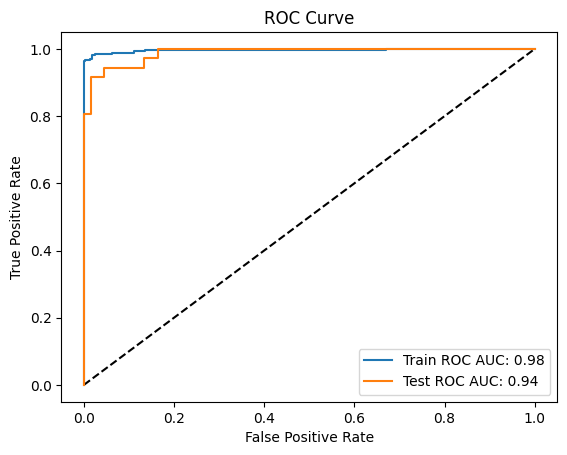


Confusion Matrix:


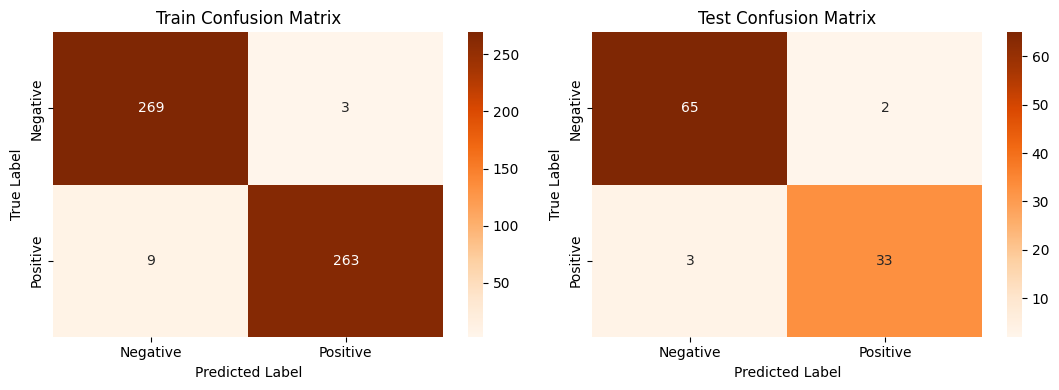


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.967626 | 0.988971 |   0.978182 | 272        |
| 1.0          |    0.988722 | 0.966912 |   0.977695 | 272        |
| accuracy     |    0.977941 | 0.977941 |   0.977941 |   0.977941 |
| macro avg    |    0.978174 | 0.977941 |   0.977938 | 544        |
| weighted avg |    0.978174 | 0.977941 |   0.977938 | 544        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.955882 | 0.970149 |   0.962963 |  67        |
| 1.0          |    0.942857 | 0.916667 |   0.929577 |  36        |
| accuracy     |    0.951456 | 0.951456 |   0.951456 |   0.951456 |
| macro avg    |    0.94937  | 0.943408 |   0.94627  | 103        |
| weighted avg |    0.95133  | 0.951456 |   0.951294 | 10

In [69]:
# Visualizing evaluation Metric Score chart
svm2_score = evaluate_model(svm_model2, X_train, X_test, y_train, y_test)

In [70]:
score['SVM tuned'] = svm2_score
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.970588                   0.977967   
Precision Test              0.951949                   0.951330   
Recall Train                0.970588                   0.977941   
Recall Test                 0.951456                   0.951456   
Accuracy Train              0.970588                   0.977941   
Accuracy Test               0.951456                   0.951456   
ROC-AUC Train               0.970588                   0.977941   
ROC-AUC Test                0.949834                   0.943408   
F1 macro Train              0.970588                   0.977941   
F1 macro Test               0.951606                   0.951294   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.971225       1.000000   
Precision Test        0.894043             0.915737       0.923989   
Recall Train          1.000000             0.970588       1.000000   
Recall Test           0.893204             0.912621       0.922330   
Accuracy Train        1.000000             0.970588       1.000000   
Accuracy Test         0.893204             0.912621       0.922330   
ROC-AUC Train         1.000000             0.970588       1.000000   
ROC-AUC Test          0.885779             0.913557       0.921020   
F1 macro Train        1.000000             0.970578       1.000000   
F1 macro Test         0.893534             0.913368       0.922791   

                 Random Forest tuned       SVM  SVM tuned  
Precision Train             0.987139  0.972433   0.978174  
Precision Test              0.951330  0.941748   0.951330  
Recall Train                0.987132  0.972426   0.977941  
Recall Test                 0.951456  0.941748   0.951456  
Accuracy Train              0.987132  0.972426   0.977941  
Accuracy Test               0.951456  0.941748   0.951456  
ROC-AUC Train               0.987132  0.972426   0.977941  
ROC-AUC Test                0.943408  0.935945   0.943408  
F1 macro Train              0.987132  0.972426   0.977938  
F1 macro Test               0.951294  0.941748   0.951294

In [71]:
# ML Model - 5 Implementation
xgb_model = xgb.XGBClassifier(random_state=42)

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 1.0
Test ROC AUC: 0.913557213930348


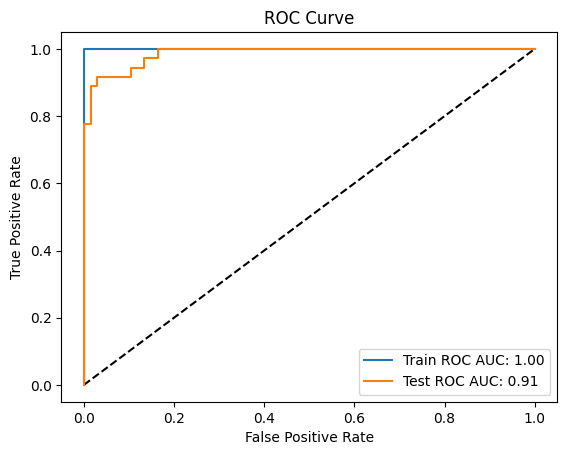


Confusion Matrix:


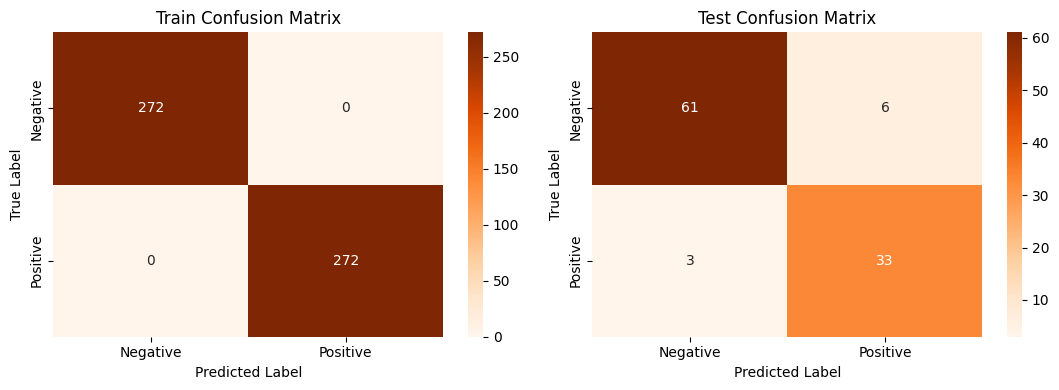


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |       272 |
| 1.0          |           1 |        1 |          1 |       272 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       544 |
| weighted avg |           1 |        1 |          1 |       544 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.953125 | 0.910448 |   0.931298 |  67        |
| 1.0          |    0.846154 | 0.916667 |   0.88     |  36        |
| accuracy     |    0.912621 | 0.912621 |   0.912621 |   0.912621 |
| macro avg    |    0.899639 | 0.913557 |   0.905649 | 103        |
| weighted avg |    0.915737 | 0.912621 |   0.913368 | 103      

In [72]:
# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)

In [73]:

# Updated Evaluation metric Score Chart
score['XGB'] = xgb_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.970588                   0.977967   
Precision Test              0.951949                   0.951330   
Recall Train                0.970588                   0.977941   
Recall Test                 0.951456                   0.951456   
Accuracy Train              0.970588                   0.977941   
Accuracy Test               0.951456                   0.951456   
ROC-AUC Train               0.970588                   0.977941   
ROC-AUC Test                0.949834                   0.943408   
F1 macro Train              0.970588                   0.977941   
F1 macro Test               0.951606                   0.951294   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.971225       1.000000   
Precision Test        0.894043             0.915737       0.923989   
Recall Train          1.000000             0.970588       1.000000   
Recall Test           0.893204             0.912621       0.922330   
Accuracy Train        1.000000             0.970588       1.000000   
Accuracy Test         0.893204             0.912621       0.922330   
ROC-AUC Train         1.000000             0.970588       1.000000   
ROC-AUC Test          0.885779             0.913557       0.921020   
F1 macro Train        1.000000             0.970578       1.000000   
F1 macro Test         0.893534             0.913368       0.922791   

                 Random Forest tuned       SVM  SVM tuned       XGB  
Precision Train             0.987139  0.972433   0.978174  1.000000  
Precision Test              0.951330  0.941748   0.951330  0.915737  
Recall Train                0.987132  0.972426   0.977941  1.000000  
Recall Test                 0.951456  0.941748   0.951456  0.912621  
Accuracy Train              0.987132  0.972426   0.977941  1.000000  
Accuracy Test               0.951456  0.941748   0.951456  0.912621  
ROC-AUC Train               0.987132  0.972426   0.977941  1.000000  
ROC-AUC Test                0.943408  0.935945   0.943408  0.913557  
F1 macro Train              0.987132  0.972426   0.977938  1.000000  
F1 macro Test               0.951294  0.941748   0.951294  0.913368

In [ ]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2 = xgb.XGBClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

In [ ]:
# Initialize model with best parameters
xgb_model2 = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)

In [ ]:
# Visualizing evaluation Metric Score chart
xgb2_score = evaluate_model(xgb_model2, X_train, X_test, y_train, y_test)

In [ ]:
score['XGB tuned'] = xgb2_score
# Updated Evaluation metric Score Chart
score

In [ ]:
# ML Model - 6 Implementation
nb_model = GaussianNB()

# Model is trained (fit) and predicted in the evaluate model

In [ ]:
# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, X_train, X_test, y_train, y_test)

In [ ]:
# Updated Evaluation metric Score Chart
score['Naive Bayes'] = nb_score
score

In [ ]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(X_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

In [ ]:
# Initiate model with best parameters
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])

In [ ]:
# Visualizing evaluation Metric Score chart
nb2_score = evaluate_model(nb_model2, X_train, X_test, y_train, y_test)

# Clasification

In [ ]:
score['Naive Bayes tuned']= nb2_score

In [ ]:
# Updated Evaluation metric Score Chart
score

In [ ]:
print(score.to_markdown())

In [ ]:
score

In [ ]:
# Removing the overfitted models which have recall, ROC-AUC, f1 scores for train as 1
score_t = score.transpose()            #taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']==1].index  #creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['ROC-AUC Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)         #creating a new dataframe with required models
adj

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(adj.index, adj["Accuracy Test"], color='skyblue')
plt.title('Model Accuracy on Test Set')
plt.xlabel('Model')
plt.ylabel('Accuracy (Test)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

# Best Models Accuracy

In [ ]:
metrics = ['Precision','Recall', 'Accuracy', 'ROC-AUC', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

In [ ]:
# Take recall as the primary evaluation metric
score_smpl = score.transpose()

# KEEP the top 3 models with highest Recall Test
top_models = score_smpl.sort_values(by='Recall Test', ascending=False).head(3)

# Drop irrelevant columns
top_models = top_models.drop([
    'Precision Train', 'Precision Test', 'Accuracy Train', 'Accuracy Test',
    'ROC-AUC Train', 'ROC-AUC Test', 'F1 macro Train', 'F1 macro Test'
], axis=1)

# Rename index
top_models.index.name = 'Classification Model'

# Print as markdown
print(top_models.to_markdown())
